# Project Overview

## Introduction

Sales forecasting enables business to allocate resources for future growth while managing cashflow properly. It also assists firms in estimating their expenditure and revenue precisely, allowing them to predict their short- and long-term success.    

Retail sales forecasting also assists retailers in meeting customer expectations by better understanding consumer purchasing trends. This results in more efficient use of shelf and display space within the retail establishment and optimal use of inventory space. 

## Problem statement
Given the data, we wish to predict the sales of each product at a particular store. From this project, we are hoping to understand the properties of products and stores, which are crucial in increasing sales and developing business strategies.

## Project Plan
1. Setup the project
    - create a virtual enviorment
    - install the requirements
    - import the packages
    - data collection - reading the data
2. Data Cleaning and preprocessing
3. Exploratory data analysis
4. Feature Engineering
5. Model Building
6. Model evaluation
7. Model deployment - *out of scope*
8. Model monitoring and maintenance - *out of scope*
9. Documentation and reporting - *out of scope*

# Setup the project

Create the virtual environment
```
python3 -m venv env
source env/bin/activate
```

Install the requirements

In [5]:
%pip install -r ../requirements.txt

  Using cached numpy-1.23.5-cp39-cp39-macosx_11_0_arm64.whl (13.4 MB)
  Using cached pandas-1.5.2-cp39-cp39-macosx_11_0_arm64.whl (10.9 MB)
  Using cached matplotlib-3.6.2-cp39-cp39-macosx_11_0_arm64.whl (7.2 MB)
  Using cached scikit_learn-1.2.0-cp39-cp39-macosx_12_0_arm64.whl (8.3 MB)
  Using cached pygam-0.8.0-py2.py3-none-any.whl (1.8 MB)
  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached contourpy-1.1.0-cp39-cp39-macosx_11_0_arm64.whl (229 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.40.0-cp39-cp39-macosx_10_9_universal2.whl (2.6 MB)
  Using cached kiwisolver-1.4.4-cp39-cp39-macosx_11_0_arm64.whl (63 kB)
  Using cached Pillow-9.5.0-cp39-cp39-macosx_11_0_arm64.whl (3.1 MB)
  Using cached pyparsing-3.1.0-py3-none-any.whl (102 kB)
  Using cached scipy-1.10.1-cp39-cp39-macosx_12_0_arm64.whl (28.9 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached 

Import packages

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder

Data collection - reading the data

In [7]:
df = pd.read_csv('../input/train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Cleaning and Preprocessing

About data - shape of the data, column names, null values etc

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


data contains 8523 observations and 12 columns. Out of these 12 features, 7 are object type (categorical), 4 floating type, and 1 is integer type. From the initial analysis, there are null values in two columns, and the response variable(Item_Outlet_Sales) doesn't have any null values.

Handle the null values in the 2 columns - Item_Weight and Outlet_Size

In [12]:
df['Item_Weight'].isna().sum()

1463

1463 null values in Item_Weight

/var/folders/nt/h1n768v954b6xdhvrsg59fl80000gn/T/ipykernel_6618/1001071604.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


<AxesSubplot: xlabel='Item_Weight', ylabel='Density'>

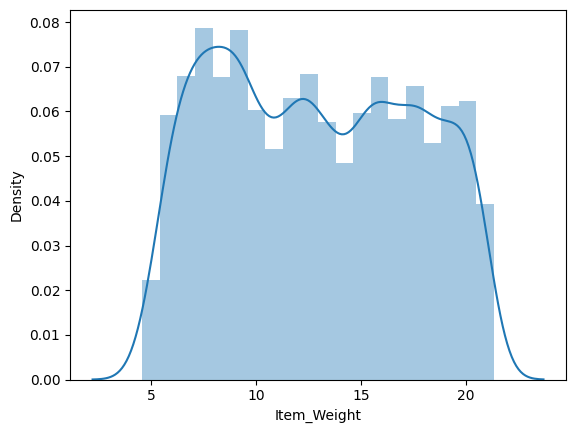

In [13]:
sns.distplot(df['Item_Weight'])

In [24]:
df['Item_Identifier'].unique().__len__()

1559

There are 1559 unique item-identifiers.

In [26]:
df.groupby('Item_Identifier')['Item_Weight'].transform('max')

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

Impute the Item Weight with its respective group's maximum value based on item identifier

In [27]:
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('max'))

In [30]:
df['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [81]:
len(df.loc[df['Outlet_Size'] == 'Small']['Item_Identifier'].unique())

1399

In [82]:
len(df.loc[df['Outlet_Size'] == 'High']['Item_Identifier'].unique())

932

In [83]:
len(df.loc[df['Outlet_Size'] == 'Medium']['Item_Identifier'].unique())

1476

In [84]:
len(df.loc[df['Outlet_Size'].isna()]['Item_Identifier'].unique())

1393

Impute the missing values in Outlet size with 'Small'

In [85]:
df['Outlet_Size'] = df['Outlet_Size'].fillna("Small")
df.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


There are 4 null values in Item Weight. Removing those observations.

In [90]:
df = df[df['Item_Weight'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


Now, there are no null values in the data. Let's check whether there are any duplicates or incorrect spelling.

In [93]:
df.Item_Fat_Content.value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Replacing the duplicates in Item_Fat_Content

In [94]:
df.replace({
    'Item_Fat_Content' :{
        'low fat': 'Low Fat',
        'LF': 'Low Fat',
        'reg': 'Regular'
    }
}, inplace=True)
df.Item_Fat_Content.value_counts()

/var/folders/nt/h1n768v954b6xdhvrsg59fl80000gn/T/ipykernel_6618/1543270846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({


Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

In [95]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64